In [1]:
import urllib.request
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# move to working directory
#working_dir = "/Users/evan/MIT/c85/FP1"
working_dir = "/Users/evan/MIT/c85/FP1/school datasets/Residential sales transactions in Metro Boston (MAPC Region)- WITH CENSUS/2020"
os.chdir(working_dir)

In [3]:
filelist = os.listdir()
#print(filelist)
data_file = 'aggregated2020.csv'
df = pd.read_csv(data_file)
#filelist[0]
df.columns


Index(['ct20_id', 'median_yearbuilt', 'median_price', 'median_prslpr',
       'mortgage', 'median_totrooms', 'median_bathrooms', 'median_bedrooms',
       'median_lotsize', 'median_intersf', 'median_flip_horizon',
       'median_price_diff', 'median_price_diff_pch', 'median_lasqbin',
       'mean_month_horizon', 'buyer_llc_ind_sum', 'buyer_bus_ind_sum',
       'buyer_trst_ind_sum', 'buyer_bnk_ind_sum', 'buyer_gse_ind_sum',
       'buyer_gov_ind_sum', 'seller_llc_ind_sum', 'seller_llp_ind_sum',
       'seller_bus_ind_sum', 'seller_trst_ind_sum', 'seller_bnk_ind_sum',
       'seller_gse_ind_sum', 'seller_gov_ind_sum', 'flip_ind_sum',
       'buy_side_flip_sum', 'sell_side_flip_sum', 'restype_R1F_sum',
       'sum_institutional_investor', 'sum_large_investor',
       'sum_medium_investor', 'sum_non_investor', 'sum_small_investor',
       'sum_non_small_llc_investor', 'sum_small_llc_investor',
       'count_1-FAM RES', 'count_2-FAM RES', 'count_3-FAM RES',
       'count_CONDOMINIUM', 'coun

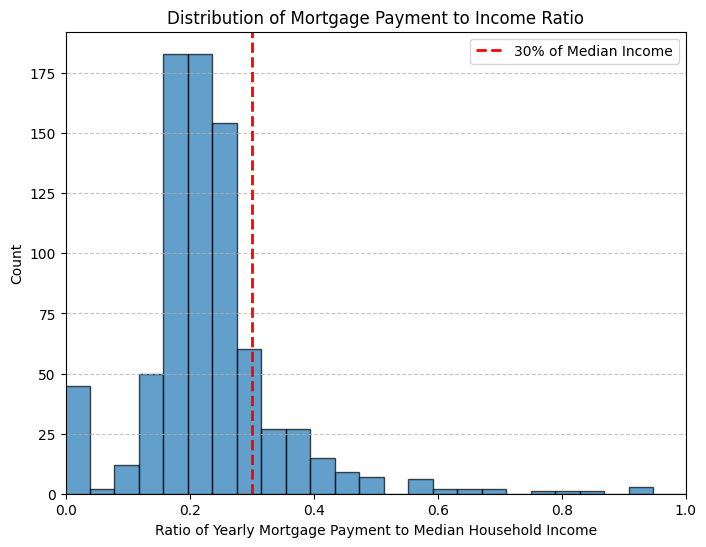

In [4]:
# Define function for yearly mortgage payment calculation
def yearly_mortgage_payment(principal, annual_interest_rate=6.5, years=30):
    """
    Calculate the yearly mortgage payment.
    
    :param principal: Loan amount (mortgage principal)
    :param annual_interest_rate: Annual interest rate (default 5%)
    :param years: Loan term in years (default 30 years)
    :return: Yearly mortgage payment
    """
    # Convert annual interest rate to monthly interest rate
    monthly_interest_rate = (annual_interest_rate / 100) / 12
    
    # Total number of payments
    total_payments = years * 12
    
    # Calculate monthly mortgage payment
    M = (principal * monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / \
        ((1 + monthly_interest_rate) ** total_payments - 1)
    
    # Convert to yearly payment
    yearly_payment = M * 12
    
    return yearly_payment

# Calculate yearly mortgage payments
df['yearly_mortgage_payment'] = df['mortgage'].apply(yearly_mortgage_payment)

# Drop rows with missing values in the relevant columns
df_filtered2 = df.dropna(subset=['yearly_mortgage_payment', 'mhi'])

""""
# Scatter plot of annual mortgage payment vs. median household income
plt.figure(figsize=(8,6))
plt.scatter(df_filtered['mhi'], df_filtered['yearly_mortgage_payment'], alpha=0.5)
plt.xlabel("Median Household Income ($)")
plt.ylabel("Yearly Mortgage Payment ($)")
plt.title("Annual Mortgage Payment vs. Median Household Income")
plt.grid(True)
plt.xlim([0,300000])
plt.ylim([0,60000])

# Show the plot
plt.show()
"""

# Define the 30% threshold line
threshold_ratio = 0.30

# Plot histogram of the ratio of yearly mortgage payment to median household income
plt.figure(figsize=(8,6))
plt.hist(df_filtered2['yearly_mortgage_payment'] / df_filtered2['mhi'], bins=300, edgecolor='black', alpha=0.7)
plt.axvline(threshold_ratio, color='red', linestyle='dashed', linewidth=2, label="30% of Median Income")

# Labels and title
plt.xlabel("Ratio of Yearly Mortgage Payment to Median Household Income")
plt.ylabel("Count")
plt.title("Distribution of Mortgage Payment to Income Ratio")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim([0,1])
#plt.yscale("log")

# Show the plot
plt.show()


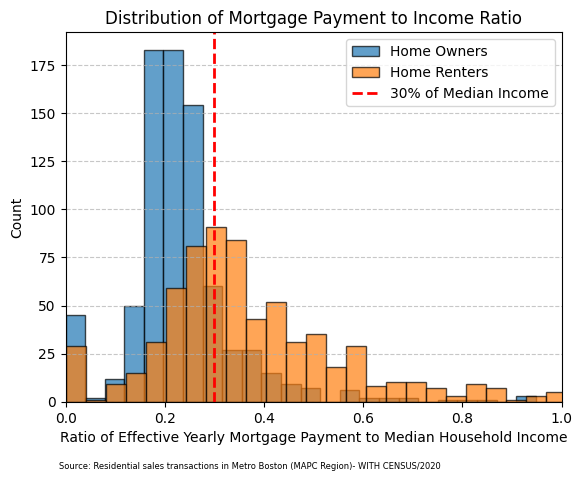

In [31]:
# Define function for yearly mortgage payment calculation
def yearly_mortgage_payment(principal, annual_interest_rate=6.5, years=30):
    """
    Calculate the yearly mortgage payment.
    
    :param principal: Loan amount (mortgage principal)
    :param annual_interest_rate: Annual interest rate (default 5%)
    :param years: Loan term in years (default 30 years)
    :return: Yearly mortgage payment
    """
    # Convert annual interest rate to monthly interest rate
    monthly_interest_rate = (annual_interest_rate / 100) / 12
    
    # Total number of payments
    total_payments = years * 12
    
    # Calculate monthly mortgage payment
    M = (principal * monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / \
        ((1 + monthly_interest_rate) ** total_payments - 1)
    
    # Convert to yearly payment
    yearly_payment = M * 12
    
    return yearly_payment


# Create ratio column: mortgage to median household income
df['mortgage_to_income_ratio'] = df['mortgage'] / df['r_mhi']

# Optionally, you might want to drop rows where the ratio is missing or infinite
df = df.dropna(subset=['mortgage_to_income_ratio'])
df = df[df['mortgage_to_income_ratio'] != float('inf')]


# Calculate yearly mortgage payments
df['yearly_mortgage_payment'] = df['mortgage'].apply(yearly_mortgage_payment)

# Drop rows with missing values in the relevant columns
df_filtered = df.dropna(subset=['yearly_mortgage_payment', 'r_mhi'])




# Define the 30% threshold line
threshold_ratio = 0.30

# Plot histogram of the ratio of yearly mortgage payment to median household income
plt.plot(figsize=(8,6))
plt.hist(df_filtered2['yearly_mortgage_payment'] / df_filtered2['mhi'], bins=300, edgecolor='black', alpha=0.7,label = "Home Owners")
plt.hist(df_filtered['yearly_mortgage_payment'] / df_filtered['r_mhi'], bins=300, edgecolor='black', alpha=0.7,label = "Home Renters")
plt.axvline(threshold_ratio, color='red', linestyle='dashed', linewidth=2, label="30% of Median Income")

# Labels and title
plt.xlabel("Ratio of Effective Yearly Mortgage Payment to Median Household Income")
plt.ylabel("Count")
plt.title("Distribution of Mortgage Payment to Income Ratio")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim([0,1])
#plt.yscale("log")
plt.text(-0.0125, -35, "Source: Residential sales transactions in Metro Boston (MAPC Region)- WITH CENSUS/2020", fontsize=6)


# Show the plot
plt.show()


In [6]:
df.columns

Index(['ct20_id', 'median_yearbuilt', 'median_price', 'median_prslpr',
       'mortgage', 'median_totrooms', 'median_bathrooms', 'median_bedrooms',
       'median_lotsize', 'median_intersf', 'median_flip_horizon',
       'median_price_diff', 'median_price_diff_pch', 'median_lasqbin',
       'mean_month_horizon', 'buyer_llc_ind_sum', 'buyer_bus_ind_sum',
       'buyer_trst_ind_sum', 'buyer_bnk_ind_sum', 'buyer_gse_ind_sum',
       'buyer_gov_ind_sum', 'seller_llc_ind_sum', 'seller_llp_ind_sum',
       'seller_bus_ind_sum', 'seller_trst_ind_sum', 'seller_bnk_ind_sum',
       'seller_gse_ind_sum', 'seller_gov_ind_sum', 'flip_ind_sum',
       'buy_side_flip_sum', 'sell_side_flip_sum', 'restype_R1F_sum',
       'sum_institutional_investor', 'sum_large_investor',
       'sum_medium_investor', 'sum_non_investor', 'sum_small_investor',
       'sum_non_small_llc_investor', 'sum_small_llc_investor',
       'count_1-FAM RES', 'count_2-FAM RES', 'count_3-FAM RES',
       'count_CONDOMINIUM', 'coun

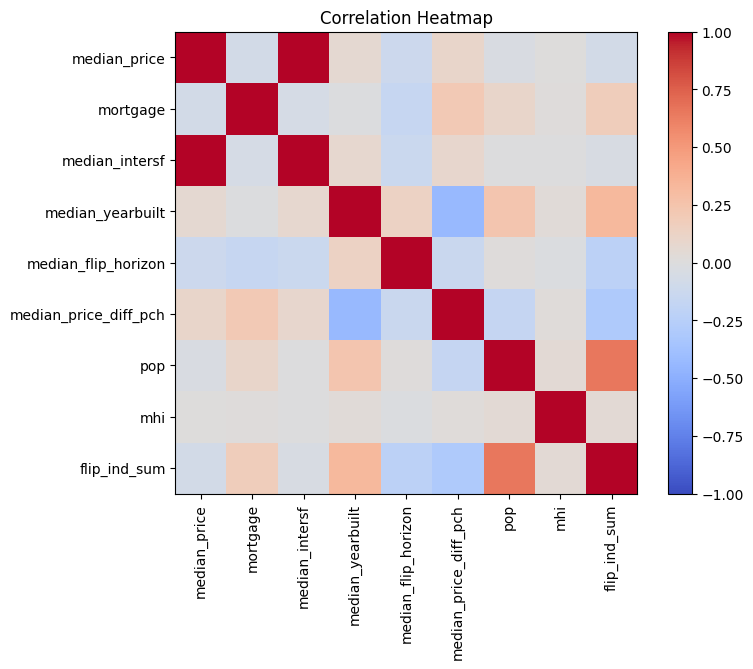

,median_price,mortgage,median_intersf,median_yearbuilt,median_flip_horizon,median_price_diff_pch,pop,mhi,flip_ind_sum
median_price,1.000000,-0.070434,0.994359,0.056785,-0.120686,0.101121,-0.037080,0.003597,-0.070790
mortgage,-0.070434,1.000000,-0.055515,-0.013922,-0.156295,0.205479,0.096948,0.012650,0.177660
median_intersf,0.994359,-0.055515,1.000000,0.075944,-0.125380,0.080559,-0.005767,-0.001662,-0.039986
median_yearbuilt,0.056785,-0.013922,0.075944,1.000000,0.131903,-0.435071,0.235570,0.027535,0.325993
median_flip_horizon,-0.120686,-0.156295,-0.125380,0.131903,1.000000,-0.138697,0.015164,-0.016650,-0.219338
median_price_diff_pch,0.101121,0.205479,0.080559,-0.435071,-0.138697,1.000000,-0.166351,0.019813,-0.300442
pop,-0.037080,0.096948,-0.005767,0.235570,0.015164,-0.166351,1.000000,0.045440,0.649637
mhi,0.003597,0.012650,-0.001662,0.027535,-0.016650,0.019813,0.045440,1.000000,0.040267
flip_ind_sum,-0.070790,0.177660,-0.039986,0.325993,-0.219338,-0.300442,0.649637,0.040267,1.000000


In [32]:


cols_of_interest = [
    'median_price', 'mortgage', 'median_intersf', 'median_yearbuilt',
    'median_flip_horizon', 'median_price_diff_pch', 'pop', 'mhi', 'flip_ind_sum'
]

# Filter out any row with missing data in these columns to avoid errors
df_corr = df[cols_of_interest].dropna()

corr_matrix = df_corr.corr()

plt.figure(figsize=(8,6))
cax = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(cols_of_interest)), cols_of_interest, rotation=90)
plt.yticks(range(len(cols_of_interest)), cols_of_interest)
plt.title('Correlation Heatmap')
plt.show()

corr_matrix


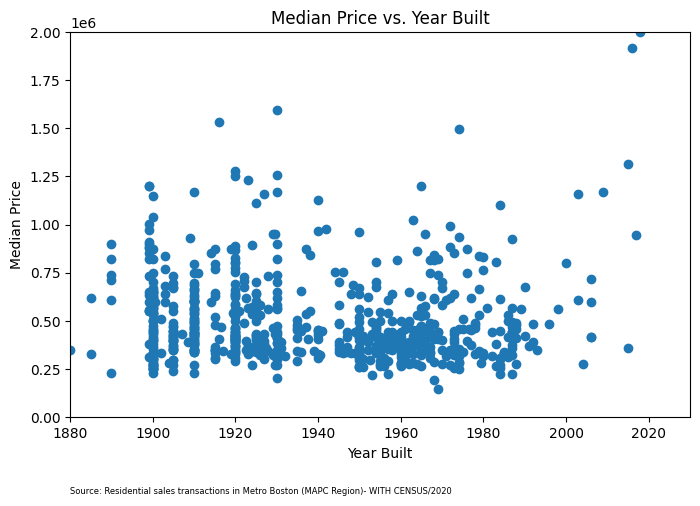

In [50]:
plt.figure(figsize=(8, 5))
plt.scatter(df['median_yearbuilt'], df['median_price'])
plt.title('Median Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Median Price')
plt.xlim([1880,2030])
plt.ylim([0,0.2e7])
plt.text(1880, -0.4e6, "Source: Residential sales transactions in Metro Boston (MAPC Region)- WITH CENSUS/2020", fontsize=6)
plt.show()


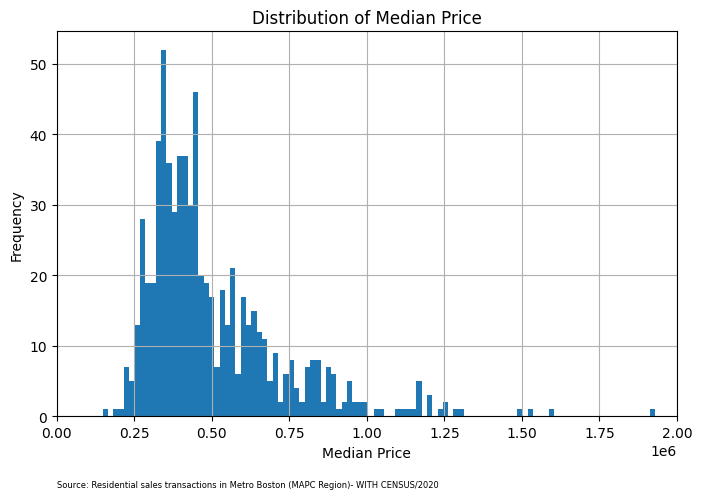

In [ ]:
plt.figure(figsize=(8, 5))
df['median_price'].hist(bins=5000)
plt.xlim([0,0.2e7])
plt.title('Distribution of Median Price')
plt.xlabel('Median Price')
plt.ylabel('Frequency')
plt.text(-0.0125, -10, "Source: Residential sales transactions in Metro Boston (MAPC Region)- WITH CENSUS/2020", fontsize=6)


#plt.yscale('log')
plt.show()

In [51]:
df.columns

Index(['ct20_id', 'median_yearbuilt', 'median_price', 'median_prslpr',
       'mortgage', 'median_totrooms', 'median_bathrooms', 'median_bedrooms',
       'median_lotsize', 'median_intersf', 'median_flip_horizon',
       'median_price_diff', 'median_price_diff_pch', 'median_lasqbin',
       'mean_month_horizon', 'buyer_llc_ind_sum', 'buyer_bus_ind_sum',
       'buyer_trst_ind_sum', 'buyer_bnk_ind_sum', 'buyer_gse_ind_sum',
       'buyer_gov_ind_sum', 'seller_llc_ind_sum', 'seller_llp_ind_sum',
       'seller_bus_ind_sum', 'seller_trst_ind_sum', 'seller_bnk_ind_sum',
       'seller_gse_ind_sum', 'seller_gov_ind_sum', 'flip_ind_sum',
       'buy_side_flip_sum', 'sell_side_flip_sum', 'restype_R1F_sum',
       'sum_institutional_investor', 'sum_large_investor',
       'sum_medium_investor', 'sum_non_investor', 'sum_small_investor',
       'sum_non_small_llc_investor', 'sum_small_llc_investor',
       'count_1-FAM RES', 'count_2-FAM RES', 'count_3-FAM RES',
       'count_CONDOMINIUM', 'coun